# Plotting with plotnine: Part 1
*******************************

In [1]:
"""
Note that plotnine currently throws a few depreciation warnings (just telling the 
package authors that their code needs to be updated at some point soon), so I will 
suppress those warnings here. 
"""
import warnings
warnings.filterwarnings('ignore')

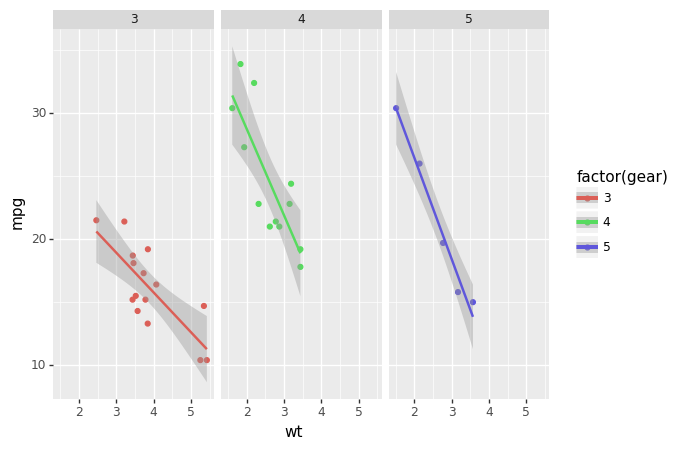

<ggplot: (-9223372036835346592)>

In [2]:
%matplotlib inline
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars

(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear'))

**Two syntactical differences from Wickham's ggplot2 for R:**  
* Everything from **ggplot** to the end of your plot code must be wrapped in parentheses.
* Column names are strings (i.e., enclosed in quotes).

The basic idea is that a statistical graphic is a mapping from data to aesthetic attributes (such as colour, shape, and size) of geometric objects (such as points, lines, and bars).

* **data**: a data frame containing the variables that you want to visualize
* **geoms**: geometric objects (circles, lines, text) that you will actually see
* **aesthetics**: the mapping from the data to the geographic objects (e.g. by describing position, size, colour, etc)

### Basic plotnine

In [3]:
import pandas as pd
from plotnine import *

gapminder = pd.read_csv("../datasets/gapminder-FiveYearData.csv")

# to download the data directly:
# gapminder <- pd.read_csv("https://raw.githubusercontent.com/swcarpentry/r-novice-gapminder/gh-pages/_episodes_rmd/data/gapminder-FiveYearData.csv")

gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


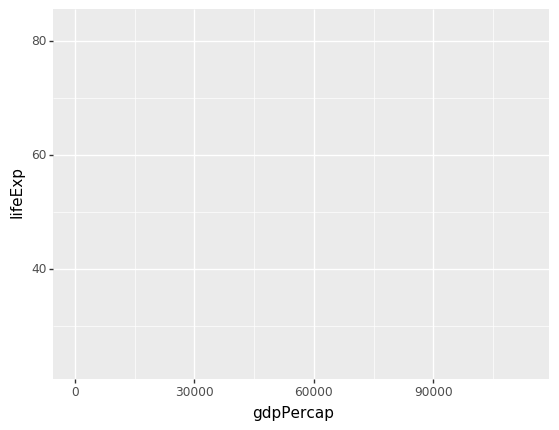

<ggplot: (-9223372036835199532)>

In [4]:
# The most basic of graphs, with no geom (geometric object) yet definied.
ggplot(gapminder, aes(x='gdpPercap', y='lifeExp'))

#### Aesthetic mapping to layers

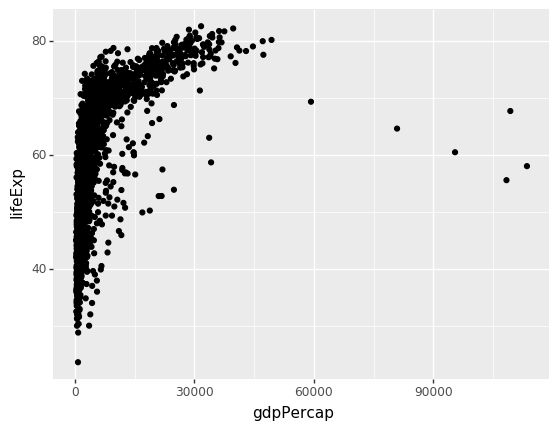

<ggplot: (-9223372036835086512)>

In [5]:
# describe the base ggplot object and tell it what data we are interested in along with the aesthetic mapping

# Note the need to wrap all the arguments in parentheses if you want to split your command onto multiple lines.
# Unlike in R, you can't end a line with a `+`

(ggplot(gapminder, aes(x='gdpPercap', y='lifeExp')) +
        geom_point()
)

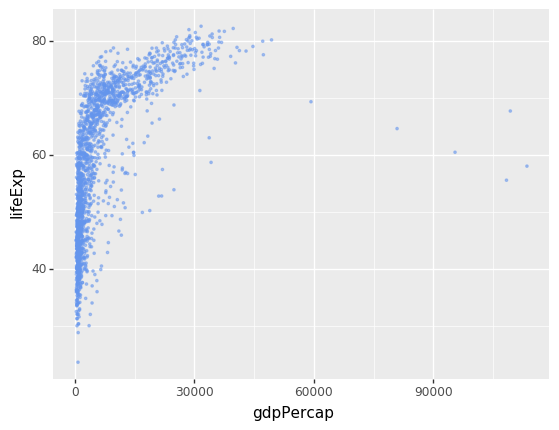

<ggplot: (-9223372036835162600)>

In [6]:
"""
we can change the transparency of all points by setting the alpha argument to a 
low value, changing the color of the points to be blue instead of black, and 
making the points smaller.
"""
(ggplot(gapminder, aes(x='gdpPercap', y='lifeExp')) +
        geom_point(color='cornflowerblue', alpha = 0.5, size = 0.5)
)

One of the truly powerful features of ggplot2 is the ability to change these aesthetics based on the data itself. For example, perhaps we want to color each point by its continent. Instead of separating the data into five different subsets (based on the possible values of continent), and adding the different colored points separately, we can simply add all the points once and add an colour aesthetic map for continent.

Note that whenever we are using a variable from the data to describe an aesthetic property of a geom, this aesthetic property needs to be included in the aes() function.

In [7]:
gapminder.continent.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

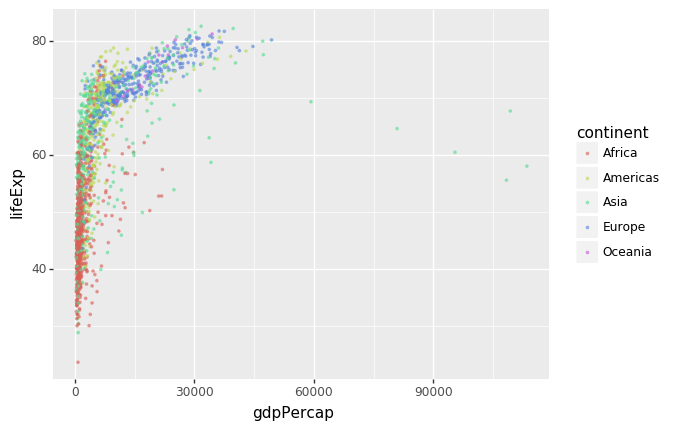

<ggplot: (-9223372036835125336)>

In [8]:
(ggplot(gapminder, aes(x='gdpPercap', y='lifeExp', color='continent')) +
        geom_point(alpha = 0.5, size = 0.5)
)

We could also add aesthetic mappings for other features such as shape, size, transparancy (alpha), and more. For example, changing the size based on population:

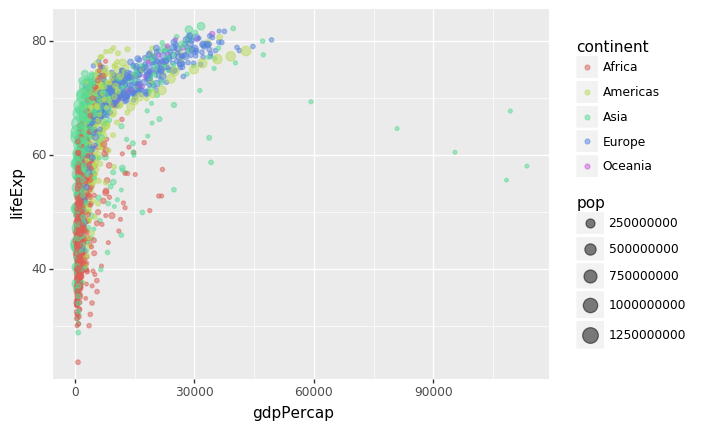

<ggplot: (-9223372036831676084)>

In [9]:
(ggplot(gapminder, aes(x='gdpPercap', y='lifeExp', color='continent', size='pop')) +
        geom_point(alpha = 0.5)
)

### Types of layers

So far, we have only seen scatterplots (point geoms), however, there are many other geoms we could add, including:

* lines
* histograms
* boxplots and violin plots
* barplots
* smoothed curves

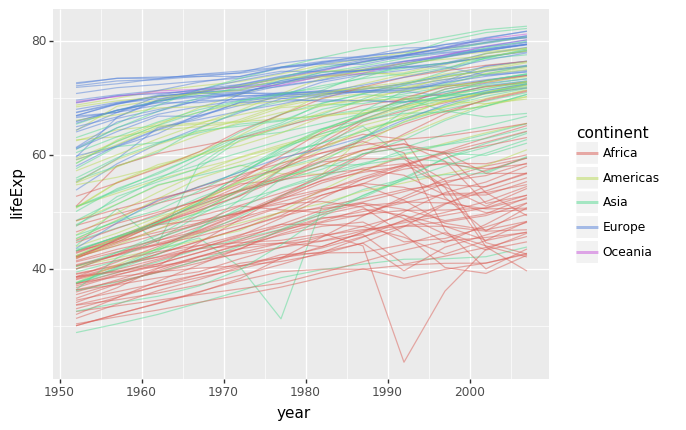

<ggplot: (-9223372036831605284)>

In [10]:
(ggplot(gapminder, aes(x='year', y='lifeExp', group='country', color='continent')) +
        geom_line(alpha = 0.5)
)

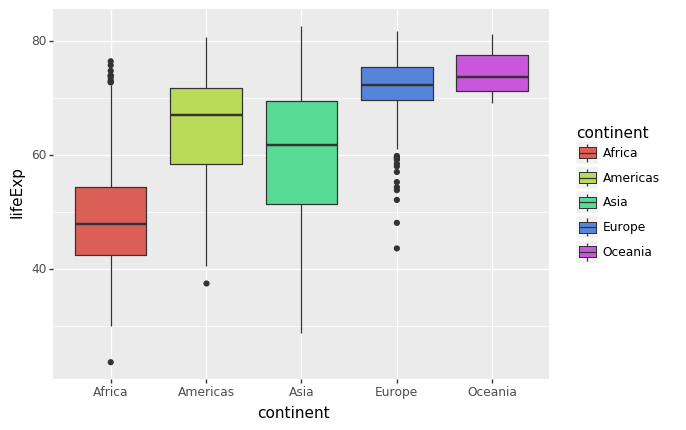

<ggplot: (-9223372036831605600)>

In [11]:
(ggplot(gapminder, aes(x='continent', y='lifeExp', fill='continent')) +
        geom_boxplot()
)

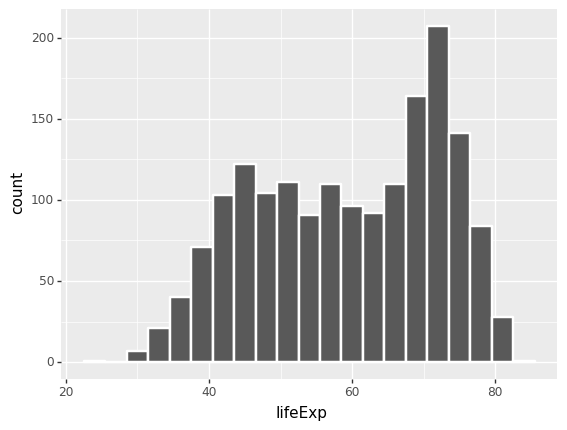

<ggplot: (-9223372036835301208)>

In [12]:
# use color and size to create borders around the bars
(ggplot(gapminder, aes(x='lifeExp')) +
        geom_histogram(binwidth = 3, color='white', size=1)
)

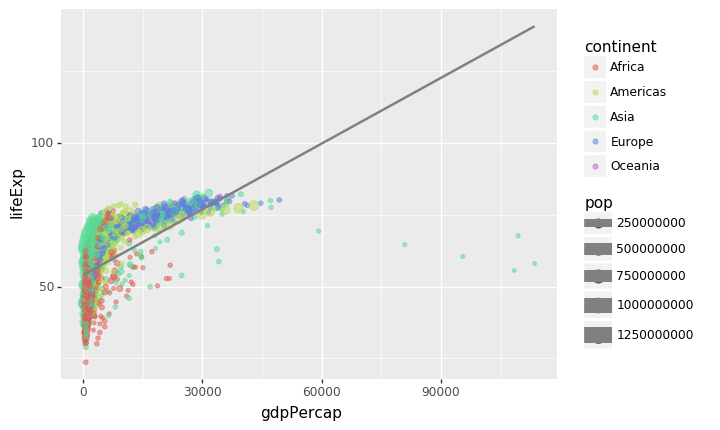

<ggplot: (-9223372036831664024)>

In [13]:
# Note that to run a loess smooth, you need to first run `pip install scikit-misc`.
(ggplot(gapminder, aes(x='gdpPercap', y='lifeExp', size='pop')) +
        geom_point(aes(color='continent'), alpha = 0.5) +
        geom_smooth(se=False, method="lm", color="grey")
)

### Saving your plots

In [14]:
p = (ggplot(gapminder, aes(x='gdpPercap', y='lifeExp', size='pop')) +
        geom_point(aes(color='continent'), alpha = 0.5) +
        geom_smooth(se=False, method="lm", color="grey")
)
# save the plot
p.save("../images/beautiful_plot_from_notebook.png")

# Plotting with plotnine: Part 2
*******************************

### Scales, legends and positioning

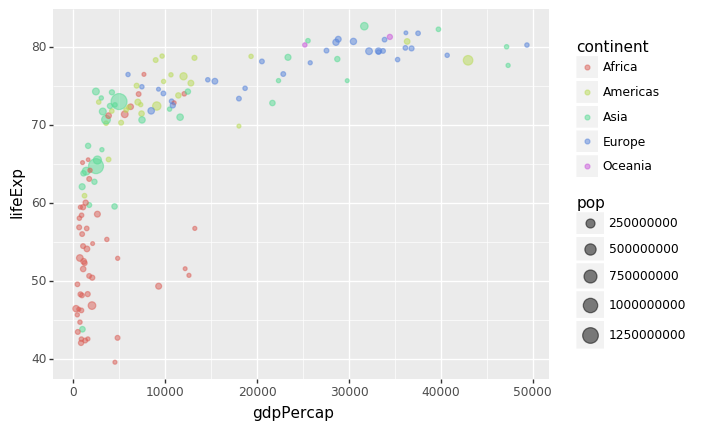

<ggplot: (-9223372036831497908)>

In [15]:
gapminder_2007 = gapminder[gapminder.year == 2007]
(ggplot(gapminder_2007, aes(x ='gdpPercap', y='lifeExp', color='continent', size='pop')) +
        geom_point(alpha=0.5)
)

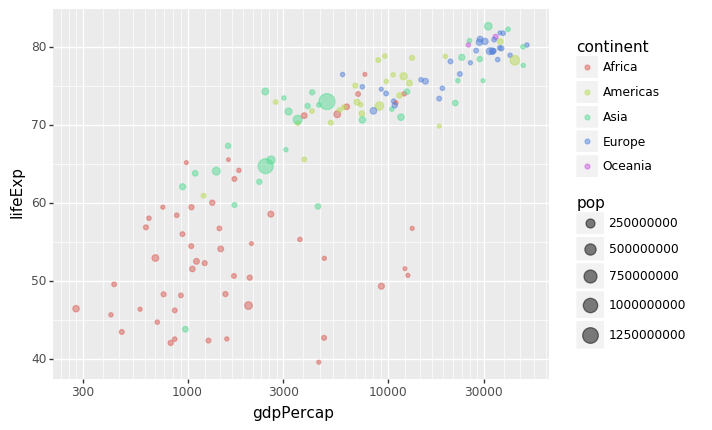

<ggplot: (-9223372036831572332)>

In [16]:
"""
The scale of a plot describes the features of the space in which it is plotted. 
Arguably, it would be better to show gdpPercap on a logarithmic scale, rather than 
in its raw form.
"""
(ggplot(gapminder_2007, aes(x='gdpPercap', y='lifeExp', color='continent', size='pop')) +
        geom_point(alpha = 0.5) +
        scale_x_log10()
)

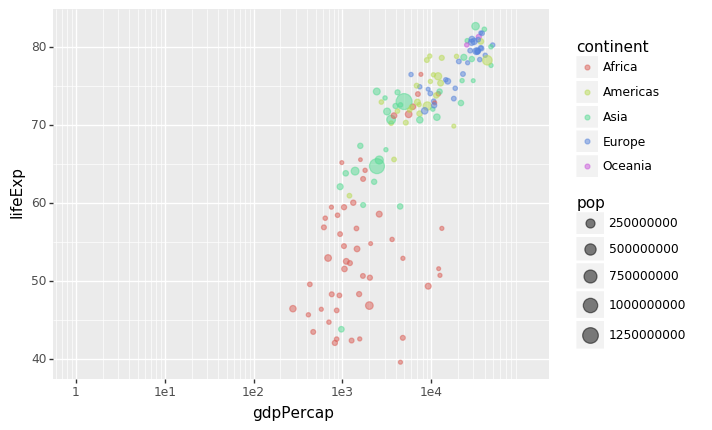

<ggplot: (-9223372036830508188)>

In [17]:
"""
The default x- (and y-) axes scales are scale_x_continuous and scale_y_continuous,
but other options include scale_x_sqrt and scale_x_reverse.

Each of these scale functions has many options including changing the limits, 
the breaks, etc. For example in the plot below, we manipulate the x-axis by 
providing arguments to our scale function of choice.
"""
(ggplot(gapminder_2007, aes(x='gdpPercap', y='lifeExp', color='continent', size='pop')) +
        geom_point(alpha = 0.5) +
        # clean the x-axis breaks
        scale_x_log10(breaks = [1, 10, 100, 1000, 10000],
                      limits = [1, 120000])
)

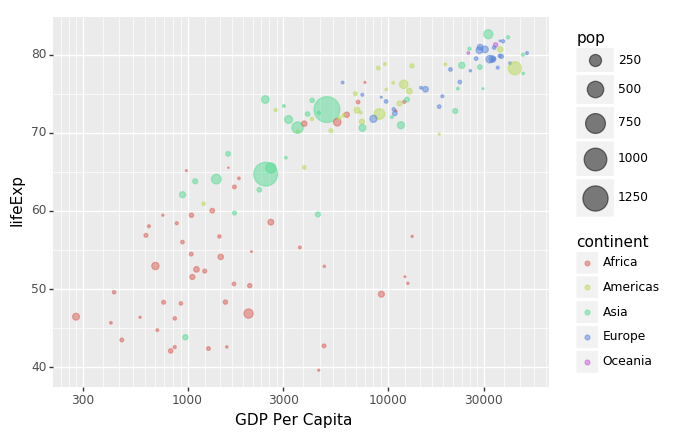

<ggplot: (-9223372036830342368)>

In [18]:
"""
We could also manipulate the scale of the size variable. Below, we expand the range of 
sizes and clean up the variable name. Since the variable we provided for size is a 
continuous variable (pop) we use the scale_size_continuous argument.
"""
(ggplot(gapminder_2007, aes(x='gdpPercap', y='lifeExp', color='continent', size='pop')) +
        # add scatter points
        geom_point(alpha = 0.5) +
        # log-scale the x-axis
        scale_x_log10(name='GDP Per Capita') +
        # change the size scale
        scale_size(range = [0.1, 10],
                   breaks =  [250000000, 500000000, 750000000, 1000000000, 1250000000],
                   labels = ["250", "500", "750", "1000", "1250"])
)

### Changing Labels

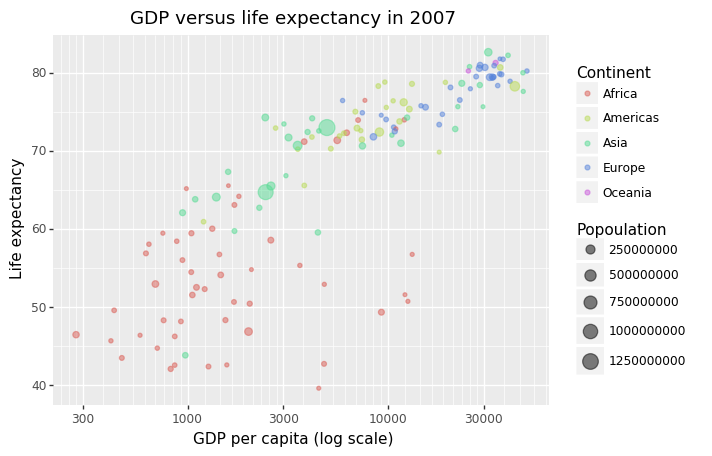

<ggplot: (-9223372036831472200)>

In [19]:
(ggplot(gapminder_2007, aes(x='gdpPercap', y='lifeExp', color='continent', size='pop')) +
        # add scatter points
        geom_point(alpha = 0.5) +
        # log-scale the x-axis
        scale_x_log10() +
        # change labels
        labs(title="GDP versus life expectancy in 2007",
             x="GDP per capita (log scale)",
             y="Life expectancy",
             size="Popoulation",
             color="Continent")
)

### Faceting

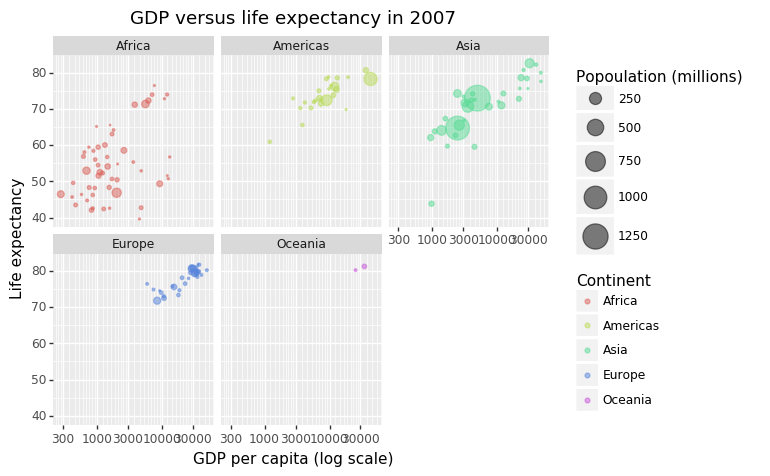

<ggplot: (-9223372036831651188)>

In [20]:
(ggplot(gapminder_2007, aes(x='gdpPercap', y='lifeExp', color='continent', size='pop')) +
        # add scatter points
        geom_point(alpha = 0.5) +
        # log-scale the x-axis
        scale_x_log10() +
        # change labels
        labs(title = "GDP versus life expectancy in 2007",
             x = "GDP per capita (log scale)",
             y = "Life expectancy",
             size = "Popoulation (millions)",
             color = "Continent") +
        # change the size scale
        scale_size(range = [0.1, 10],
                   breaks =  [250000000, 500000000, 750000000, 1000000000, 1250000000],
                   labels = ["250", "500", "750", "1000", "1250"]) +
        facet_wrap('continent')
)

### Themes: making even more beautiful figures with plotnine

One of the simplest themes is **theme_classic**, however there are several other themes to choose from. The **ggthemes** package offers many additional themes, but you could also make your own using the theme() function.

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


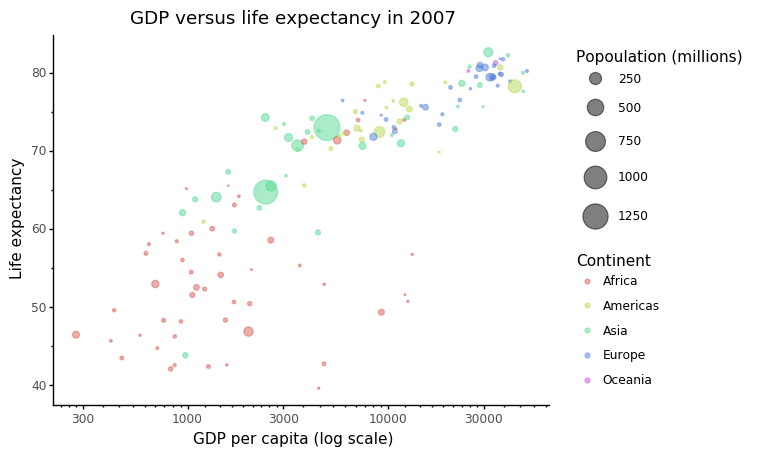

<ggplot: (-9223372036830341696)>

In [21]:
(ggplot(gapminder_2007, aes(x='gdpPercap', y='lifeExp', color='continent', size='pop')) +
        # add scatter points
        geom_point(alpha = 0.5) +
        # log-scale the x-axis
        scale_x_log10() +
        # change labels
        labs(title = "GDP versus life expectancy in 2007",
             x = "GDP per capita (log scale)",
             y = "Life expectancy",
             size = "Popoulation (millions)",
             color = "Continent") +
        # change the size scale
        scale_size(range = [0.1, 10],
                   breaks =  [250000000, 500000000, 750000000, 1000000000, 1250000000],
                   labels = ["250", "500", "750", "1000", "1250"]) +
        # add a nicer theme
        theme_classic(base_family = "Helvetica")
)

### Miscellaneous Graphs

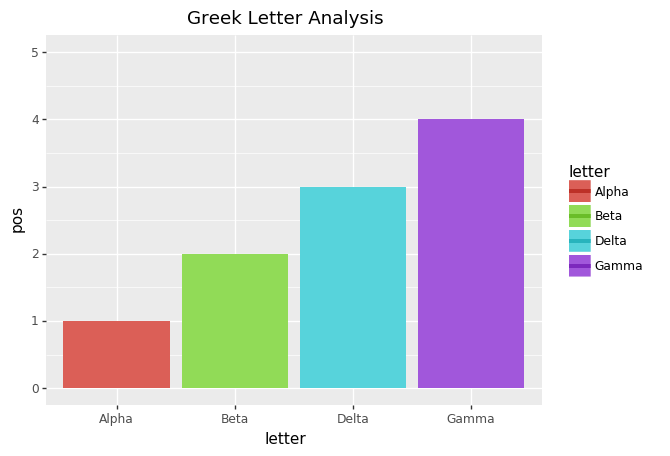

<ggplot: (-9223372036831761108)>

In [22]:
df = pd.DataFrame({
    'letter': ['Alpha', 'Beta', 'Delta', 'Gamma'],
    'pos': [1, 2, 3, 4],
    'num_of_letters': [5, 4, 5, 5]
})

(ggplot(df)
 + geom_col(aes(x='letter',y='pos', fill='letter'))
 + geom_line(aes(x='letter', y='num_of_letters', color='letter'), size=1)
 + scale_color_hue(l=0.45)                                  # some contrast to make the lines stick out
 + ggtitle('Greek Letter Analysis')
)

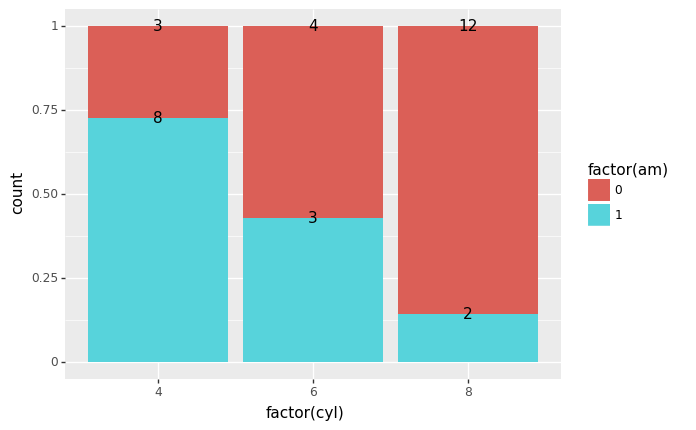

<ggplot: (-9223372036831781500)>

In [23]:
from plotnine.data import mtcars

(ggplot(mtcars, aes('factor(cyl)', fill='factor(am)'))
 + geom_bar( position='fill')
 + geom_text(aes(label='stat(count)'), stat='count', position='fill')
)

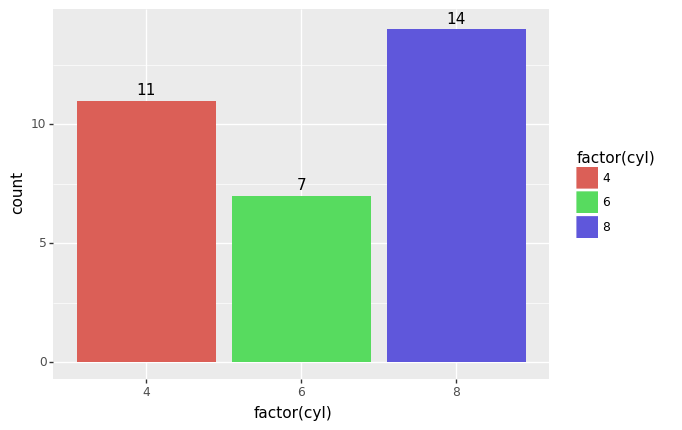

<ggplot: (-9223372036831394012)>

In [24]:
(ggplot(mtcars, aes('factor(cyl)', fill='factor(cyl)'))
 + geom_bar()
 + geom_text(
     aes(label='stat(count)'),
     stat='count',
     nudge_y=0.125,
     va='bottom'
 )
)

### Some scatterplots...

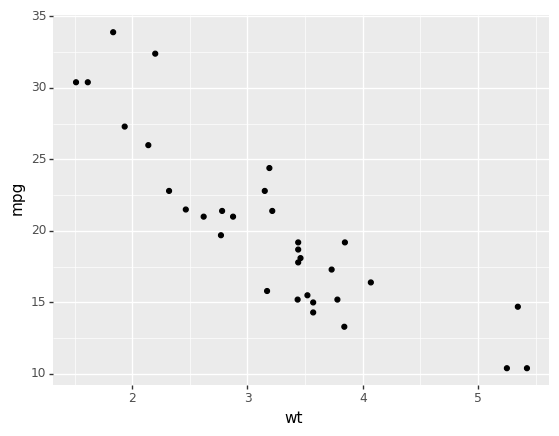

<ggplot: (-9223372036835162484)>

In [25]:
(ggplot(mtcars, aes('wt', 'mpg'))
 + geom_point())

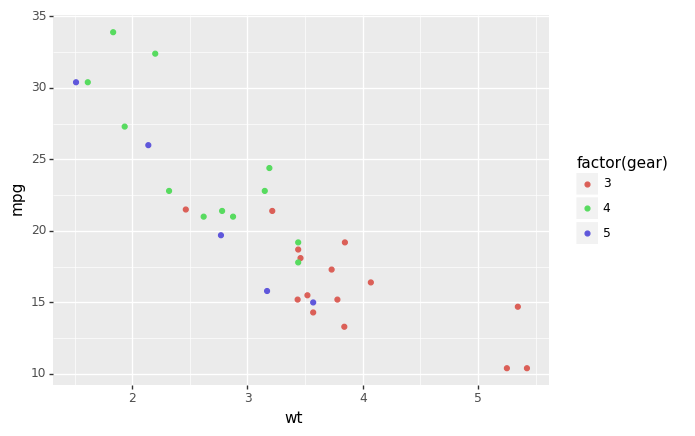

<ggplot: (-9223372036835125384)>

In [26]:
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point())

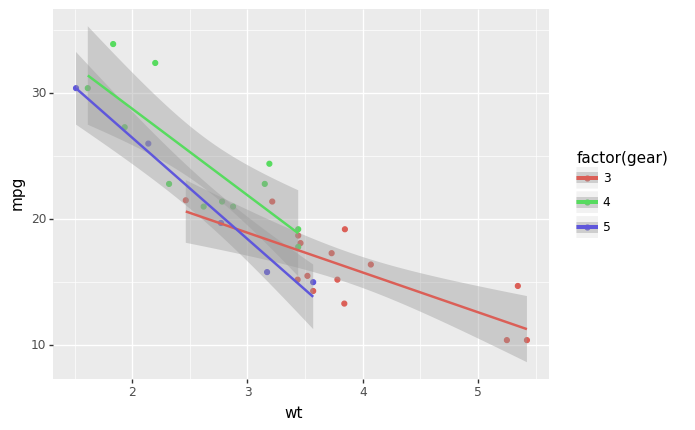

<ggplot: (-9223372036831580556)>

In [27]:
"""
Scatter plot colored according to some variable and smoothed with a linear model
with confidence intervals.
"""
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm'))

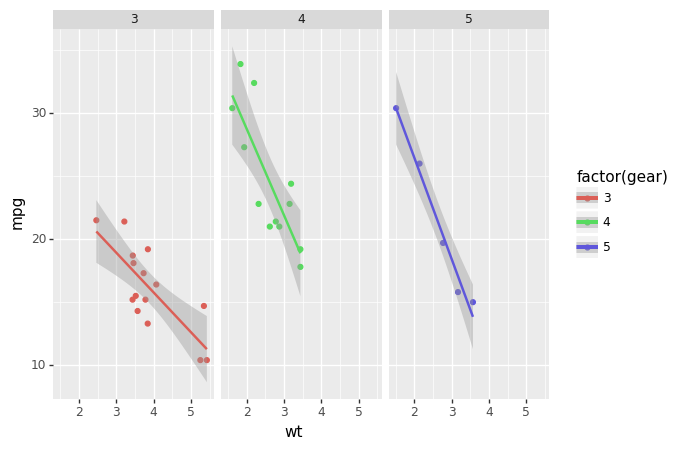

<ggplot: (-9223372036831580212)>

In [28]:
"""
Scatter plot colored according to some variable, smoothed with a linear model with 
confidence intervals and plotted on separate panels.
"""
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear'))

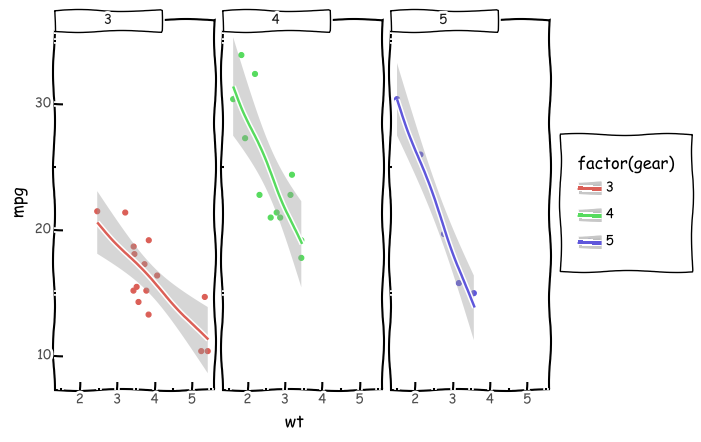

<ggplot: (-9223372036831430688)>

In [29]:
# Not that I would ever do this...
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear')
 + theme_xkcd())